In [1]:
import numpy as np
import pandas as pd
import scipy 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
dataframe = pd.read_csv('D:\Python\ML\Life Expectancy Data.csv')
dataframe.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
dataframe.columns.values

array(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'], dtype=object)

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Let's see how many nulls value in each feature of this dataframe

In [5]:
columns = list(dataframe.columns)
for i in columns:
    print(i, ": ", dataframe[i].isnull().sum())

Country :  0
Year :  0
Status :  0
Life expectancy  :  10
Adult Mortality :  10
infant deaths :  0
Alcohol :  194
percentage expenditure :  0
Hepatitis B :  553
Measles  :  0
 BMI  :  34
under-five deaths  :  0
Polio :  19
Total expenditure :  226
Diphtheria  :  19
 HIV/AIDS :  0
GDP :  448
Population :  652
 thinness  1-19 years :  34
 thinness 5-9 years :  34
Income composition of resources :  167
Schooling :  163


As we can see, 'Life Expectancy' and 'Adult morality' has few null values, so we can fill them with mean value.


In [6]:
dataframe['Life expectancy ']=dataframe['Life expectancy '].fillna(value=dataframe['Life expectancy '].mean())
dataframe['Adult Mortality']=dataframe['Adult Mortality'].fillna(value=dataframe['Adult Mortality'].mean())

Since other features has great amount of null values, we're gonna fill each of these feature one by one so that we won't mislead the original structure of the dataframe.
Since these feature has great amount of null, then filling them with means is no longer "good", we're gonna fill these gaps by using correlations with other features. To do this let us first see the correlation matrix of these features using '.corr' method by pandas.

In [7]:
corr_data=dataframe.corr()
corr_data

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.404029,0.381791,0.255760,-0.157574,0.564466,-0.222503,0.464531,0.216373,0.478465,-0.556457,0.461393,-0.021548,-0.476561,-0.470977,0.724631,0.748263
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.195454,-0.242814,-0.161828,0.031174,-0.384806,0.094135,-0.274218,-0.114355,-0.274540,0.523727,-0.296019,-0.013639,0.302501,0.308053,-0.457530,-0.452380
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404029,-0.195454,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.255760,-0.161828,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.564466,-0.384806,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


Let's start with our first feature: Alcohol, from table above we can see that 'Schooling' is a feature which has good correlation with 'Alcohol' (0.54738). Let's observe them in a scatter plot


<AxesSubplot:xlabel='Schooling', ylabel='Alcohol'>

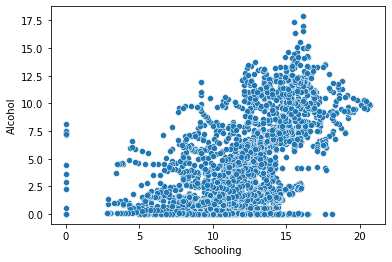

In [8]:
sns.scatterplot(x=dataframe['Schooling'],y=dataframe['Alcohol'])

Let's fill null value of 'Alcohol' with their mean value with respect to 'Schooling' interval

In [9]:

#data[data['Diphtheria ']>80.0]['Hepatitis B'].mean()
def impute_Alcohol(cols):
    al=cols[0]
    sc=cols[1]
    if pd.isnull(al):
        if sc<=2.5:
            return dataframe[dataframe['Schooling']<=2.5]['Alcohol'].mean()
        elif 2.5<sc<=5.0:
            return dataframe[(2.5<dataframe['Schooling']) &(dataframe['Schooling'] <=5)]['Alcohol'].mean()
        elif 5.0<sc<=7.5:
            return dataframe[(5<dataframe['Schooling']) &(dataframe['Schooling'] <=7.5)]['Alcohol'].mean()
        elif 7.5<sc<=10.0:
            return dataframe[(7.5<dataframe['Schooling']) &(dataframe['Schooling'] <=10)]['Alcohol'].mean()
        elif 10.0<sc<=12.5:
            return dataframe[(10<dataframe['Schooling']) &(dataframe['Schooling'] <=12.5)]['Alcohol'].mean()
        elif 12.5<sc<=15:
            return dataframe[(12.5<dataframe['Schooling']) &(dataframe['Schooling'] <=15)]['Alcohol'].mean()
        elif sc>15:
            return dataframe[dataframe['Schooling']>15]['Alcohol'].mean()
    else:
        return al
    
dataframe['Alcohol']=dataframe[['Alcohol','Schooling']].apply(impute_Alcohol,axis=1)

In [10]:
columns = list(dataframe.columns)
for i in columns:
    print(i, ": ", dataframe[i].isnull().sum())

Country :  0
Year :  0
Status :  0
Life expectancy  :  0
Adult Mortality :  0
infant deaths :  0
Alcohol :  9
percentage expenditure :  0
Hepatitis B :  553
Measles  :  0
 BMI  :  34
under-five deaths  :  0
Polio :  19
Total expenditure :  226
Diphtheria  :  19
 HIV/AIDS :  0
GDP :  448
Population :  652
 thinness  1-19 years :  34
 thinness 5-9 years :  34
Income composition of resources :  167
Schooling :  163


Since 'Schooling' in not non-null, which means there still exists 'Alcohol' null values that failed to fill. Let's fill them with mean value

In [11]:
dataframe['Alcohol']=dataframe['Alcohol'].fillna(value=dataframe['Alcohol'].mean())

Next, let's handle 'Herpatitis B', from the correlation table above, we can see a great correalation with 'Polio'. However, from previous consideration, since 'Polio' is also not non-null, then it would be no use.
So, we're gonna handle 'Polio' with 'Life Expectancy' first since 'Life Expectancy' is non-null and they're well-correlated

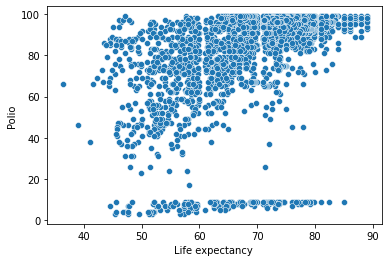

In [12]:
sns.scatterplot(x=dataframe['Life expectancy '],y=dataframe['Polio']);

In [13]:
def impute_polio(c):
    p=c[0]
    l=c[1]
    if pd.isnull(p):
        if l<=45:
            return dataframe[dataframe['Life expectancy ']<=45]['Polio'].mean()
        elif 45<l<=50:
            return dataframe[(45<dataframe['Life expectancy ']) &(dataframe['Life expectancy '] <=50)]['Polio'].mean()
        elif 50<l<=60:
            return dataframe[(50<dataframe['Life expectancy ']) &(dataframe['Life expectancy '] <=60)]['Polio'].mean()
        elif 60<l<=70:
            return dataframe[(60<dataframe['Life expectancy ']) &(dataframe['Life expectancy '] <=70)]['Polio'].mean()
        elif 70<l<=80:
            return dataframe[(70<dataframe['Life expectancy ']) &(dataframe['Life expectancy '] <=80)]['Polio'].mean()
        elif l>80:
            return dataframe[dataframe['Life expectancy ']>80]['Polio'].mean()
    else:
        return p
    
dataframe['Polio']=dataframe[['Polio','Life expectancy ']].apply(impute_polio,axis=1)

Let's check if 'Polio' has filled all null values or not

In [14]:
columns = list(dataframe.columns)
for i in columns:
    print(i, ": ", dataframe[i].isnull().sum())

Country :  0
Year :  0
Status :  0
Life expectancy  :  0
Adult Mortality :  0
infant deaths :  0
Alcohol :  0
percentage expenditure :  0
Hepatitis B :  553
Measles  :  0
 BMI  :  34
under-five deaths  :  0
Polio :  0
Total expenditure :  226
Diphtheria  :  19
 HIV/AIDS :  0
GDP :  448
Population :  652
 thinness  1-19 years :  34
 thinness 5-9 years :  34
Income composition of resources :  167
Schooling :  163


OK, now let's continue with 'Diphtheria' since is the most correlated with Polio

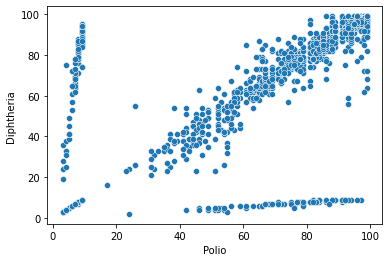

In [15]:
sns.scatterplot(x=dataframe['Polio'],y=dataframe['Diphtheria ']);

In [16]:
def impute_Diptheria(c):
    d=c[0]
    p=c[1]
    if pd.isnull(d):
        if p<=10:
            return dataframe[dataframe['Polio']<=10]['Diphtheria '].mean()
        elif 10<p<=40:
            return dataframe[(10<dataframe['Polio']) &(dataframe['Polio'] <=40)]['Diphtheria '].mean()
        elif 40<p<=45:
            return dataframe[(40<dataframe['Polio']) &(dataframe['Polio'] <=45)]['Diphtheria '].mean()
        elif 45<p<=50:
            return dataframe[(45<dataframe['Polio']) &(dataframe['Polio'] <=50)]['Diphtheria '].mean()
        elif 50<p<=60:
            return dataframe[(50<dataframe['Polio']) &(dataframe['Polio'] <=60)]['Diphtheria '].mean()
        elif 60<p<=80:
            return dataframe[(60<dataframe['Polio']) &(dataframe['Polio'] <=80)]['Diphtheria '].mean()
        elif p>80:
            return dataframe[dataframe['Polio']>80]['Diphtheria '].mean()
    else:
        return d
dataframe['Diphtheria ']=dataframe[['Diphtheria ','Polio']].apply(impute_Diptheria,axis=1)

Similarly, we're gonna handle 'Hepatitis B' using 'Diptheria' feature.

<AxesSubplot:xlabel='Diphtheria ', ylabel='Hepatitis B'>

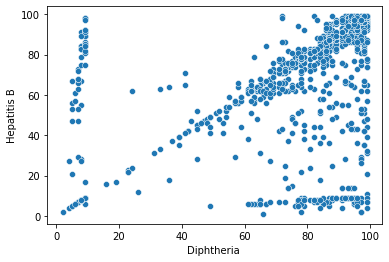

In [17]:
sns.scatterplot(x=dataframe['Diphtheria '],y=dataframe['Hepatitis B'])

In [18]:
def impute_HepatatisB(cols):
    hep=cols[0]
    dip=cols[1]
    if pd.isnull(hep):
        if dip<=15:
            return dataframe[dataframe['Diphtheria ']<=15]['Hepatitis B'].mean()
        elif 15<dip<=30:
            return dataframe[(15<dataframe['Diphtheria ']) &(dataframe['Diphtheria '] <=30)]['Hepatitis B'].mean()
        elif 30<dip<=45:
            return dataframe[(30<dataframe['Diphtheria ']) &(dataframe['Diphtheria '] <=45)]['Hepatitis B'].mean()
        elif 45<dip<=60:
            return dataframe[(45<dataframe['Diphtheria ']) &(dataframe['Diphtheria '] <=60)]['Hepatitis B'].mean()
        elif 60<dip<=80:
            return dataframe[(60<dataframe['Diphtheria ']) &(dataframe['Diphtheria '] <=80)]['Hepatitis B'].mean()
        elif dip>80:
            return dataframe[dataframe['Diphtheria ']>80]['Hepatitis B'].mean()
    else:
        return hep
    
dataframe['Hepatitis B']=dataframe[['Hepatitis B','Diphtheria ']].apply(impute_HepatatisB,axis=1)

Let's continue with the remaining feature which is not non-null

<AxesSubplot:xlabel='Life expectancy ', ylabel=' BMI '>

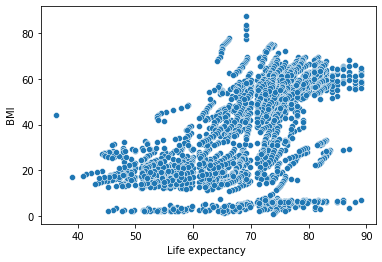

In [19]:
sns.scatterplot(x=dataframe['Life expectancy '],y=dataframe[' BMI '])

In [20]:
def impute_BMI(c):
    b=c[0]
    l=c[1]
    if pd.isnull(b):
        if l<=50:
            return dataframe[dataframe['Life expectancy ']<=50][' BMI '].mean()
        elif 50<l<=60:
            return dataframe[(50<dataframe['Life expectancy ']) &(dataframe['Life expectancy '] <=60)][' BMI '].mean()
        elif 60<l<=70:
            return dataframe[(60<dataframe['Life expectancy ']) &(dataframe['Life expectancy '] <=70)][' BMI '].mean()
        elif 70<l<=80:
            return dataframe[(70<dataframe['Life expectancy ']) &(dataframe['Life expectancy '] <=80)][' BMI '].mean()
        elif 80<l<=100:
            return dataframe[(80<dataframe['Life expectancy ']) &(dataframe['Life expectancy '] <=100)][' BMI '].mean()
    else:
        return b
    
dataframe[' BMI ']=dataframe[[' BMI ','Life expectancy ']].apply(impute_BMI,axis=1)

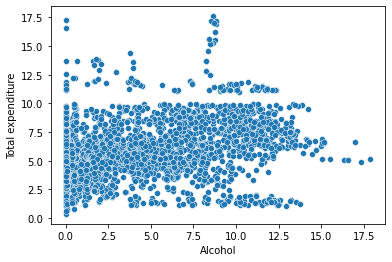

In [21]:
sns.scatterplot(y=dataframe['Total expenditure'],x=dataframe['Alcohol']);

In [22]:
def impute_Total_exp(c):
    t=c[0]
    a=c[1]
    if pd.isnull(t):
        if a<=2.5:
            return dataframe[dataframe['Alcohol']<=2.5]['Total expenditure'].mean()
        elif 2.5<a<=5.0:
            return dataframe[(2.5<dataframe['Alcohol']) &(dataframe['Alcohol'] <=5.0)]['Total expenditure'].mean()
        elif 5.0<a<=10.0:
            return dataframe[(5<dataframe['Alcohol']) &(dataframe['Alcohol'] <=10.0)]['Total expenditure'].mean()
        elif 10.0<a<=12.5:
            return dataframe[(10<dataframe['Alcohol']) &(dataframe['Alcohol'] <=12.5)]['Total expenditure'].mean()
        elif a>12.5:
            return dataframe[dataframe['Alcohol']>12.5]['Total expenditure'].mean()
    else:
        return t
    
dataframe['Total expenditure']=dataframe[['Total expenditure','Alcohol']].apply(impute_Total_exp,axis=1) 

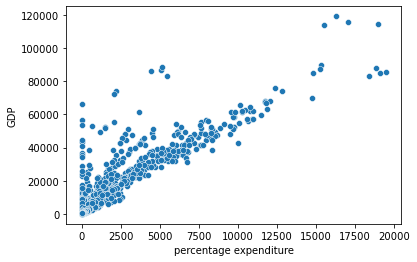

In [23]:
sns.scatterplot(x=dataframe['percentage expenditure'],y=dataframe['GDP']);

In [24]:
def impute_GDP(c):
    g=c[0]
    p=c[1]
    if pd.isnull(g):
        if p<=1250:
            return dataframe[dataframe['percentage expenditure']<=1250]['GDP'].mean()
        elif 1250<p<=2500:
            return dataframe[(1250<dataframe['percentage expenditure']) &(dataframe['percentage expenditure'] <=2500)]['GDP'].mean()
        elif 2500<p<=3750:
            return dataframe[(2500<dataframe['percentage expenditure']) &(dataframe['percentage expenditure'] <=3750)]['GDP'].mean()
        elif 3750<p<=7500:
            return dataframe[(3750<dataframe['percentage expenditure']) &(dataframe['percentage expenditure'] <=7500)]['GDP'].mean()
        elif 7500<p<=8750:
            return dataframe[(7500<dataframe['percentage expenditure']) &(dataframe['percentage expenditure'] <=8750)]['GDP'].mean()
        elif 8750<p<=10000:
            return dataframe[(8750<dataframe['percentage expenditure']) &(dataframe['percentage expenditure'] <=10000)]['GDP'].mean()
        elif 10000<p<=11250:
            return dataframe[(10000<dataframe['percentage expenditure']) &(dataframe['percentage expenditure'] <=11250)]['GDP'].mean()
        elif 11250<p<=12500:
            return dataframe[(11250<dataframe['percentage expenditure']) &(dataframe['percentage expenditure'] <=12500)]['GDP'].mean()
        elif 12500<p<=15000:
            return dataframe[(12500<dataframe['percentage expenditure']) &(dataframe['percentage expenditure'] <=15000)]['GDP'].mean()
        elif 15000<p<=17500:
            return dataframe[(15000<dataframe['percentage expenditure']) &(dataframe['percentage expenditure'] <=17500)]['GDP'].mean()
        elif p>17500:
            return dataframe[dataframe['percentage expenditure']>17500]['GDP'].mean()
    else:
        return g
    
dataframe['GDP']=dataframe[['GDP','percentage expenditure']].apply(impute_GDP,axis=1)

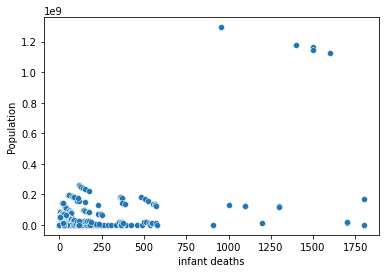

In [25]:
sns.scatterplot(x=dataframe['infant deaths'],y=dataframe['Population']);


In [26]:
def impute_population(c):
    p=c[0]
    i=c[1]
    if pd.isnull(p):
        if i<=100:
            return dataframe[dataframe['infant deaths']<=100]['Population'].mean()
        elif 100<i<=250:
            return dataframe[(100<dataframe['infant deaths']) &(dataframe['infant deaths'] <=250)]['Population'].mean()
        elif 250<i<=350:
            return dataframe[(250<dataframe['infant deaths']) &(dataframe['infant deaths'] <=350)]['Population'].mean()
        elif 350<i<=900:
            return dataframe[(350<dataframe['infant deaths']) &(dataframe['infant deaths'] <=900)]['Population'].mean()
        elif 900<i<=1100:
            return dataframe[(900<dataframe['infant deaths']) &(dataframe['infant deaths'] <=1100)]['Population'].mean()
        elif 1100<i<=1250:
            return dataframe[(1100<dataframe['infant deaths']) &(dataframe['infant deaths'] <=1250)]['Population'].mean()
        elif 1250<i<=1500:
            return dataframe[(1250<dataframe['infant deaths']) &(dataframe['infant deaths'] <=1500)]['Population'].mean()
        elif 1500<i<=1750:
            return dataframe[(1500<dataframe['infant deaths']) &(dataframe['infant deaths'] <=1750)]['Population'].mean()
        elif i>1750:
            return dataframe[dataframe['infant deaths']>1750]['Population'].mean()
    else:
        return p
    
dataframe['Population']=dataframe[['Population','infant deaths']].apply(impute_population,axis=1)

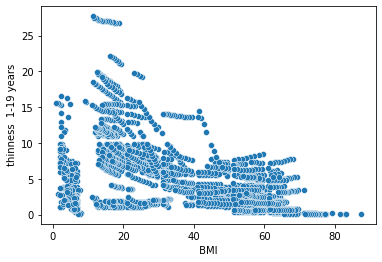

In [27]:
sns.scatterplot(x=dataframe[' BMI '],y=dataframe[' thinness  1-19 years']);

In [28]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return dataframe[dataframe[' BMI ']<=10][' thinness  1-19 years'].mean()
        elif 10<b<=20:
            return dataframe[(10<dataframe[' BMI ']) &(dataframe[' BMI '] <=20)][' thinness  1-19 years'].mean()
        elif 20<b<=30:
            return dataframe[(20<dataframe[' BMI ']) &(dataframe[' BMI '] <=30)][' thinness  1-19 years'].mean()
        elif 30<b<=40:
            return dataframe[(30<dataframe[' BMI ']) &(dataframe[' BMI '] <=40)][' thinness  1-19 years'].mean()
        elif 40<b<=50:
            return dataframe[(40<dataframe[' BMI ']) &(dataframe[' BMI '] <=50)][' thinness  1-19 years'].mean()
        elif 50<b<=70:
            return dataframe[(50<dataframe[' BMI ']) &(dataframe[' BMI '] <=60)][' thinness  1-19 years'].mean()
        elif b>70:
            return dataframe[dataframe[' BMI ']>70][' thinness  1-19 years'].mean()
    else:
        return t
    
dataframe[' thinness  1-19 years']=dataframe[[' thinness  1-19 years',' BMI ']].apply(impute_Thin_1,axis=1)

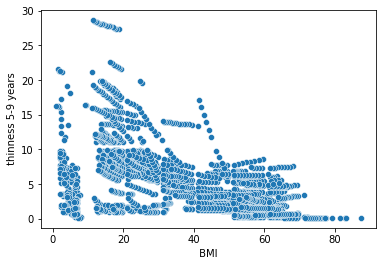

In [29]:
sns.scatterplot(x=dataframe[' BMI '],y=dataframe[' thinness 5-9 years']);

In [30]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return dataframe[dataframe[' BMI ']<=10][' thinness 5-9 years'].mean()
        elif 10<b<=20:
            return dataframe[(10<dataframe[' BMI ']) &(dataframe[' BMI '] <=20)][' thinness 5-9 years'].mean()
        elif 20<b<=30:
            return dataframe[(20<dataframe[' BMI ']) &(dataframe[' BMI '] <=30)][' thinness 5-9 years'].mean()
        elif 30<b<=40:
            return dataframe[(30<dataframe[' BMI ']) &(dataframe[' BMI '] <=40)][' thinness 5-9 years'].mean()
        elif 40<b<=50:
            return dataframe[(40<dataframe[' BMI ']) &(dataframe[' BMI '] <=50)][' thinness 5-9 years'].mean()
        elif 50<b<=70:
            return dataframe[(50<dataframe[' BMI ']) &(dataframe[' BMI '] <=70)][' thinness 5-9 years'].mean()
        elif b>70:
            return dataframe[dataframe[' BMI ']>70][' thinness 5-9 years'].mean()
    else:
        return t
    
dataframe[' thinness 5-9 years']=dataframe[[' thinness 5-9 years',' BMI ']].apply(impute_Thin_1,axis=1)

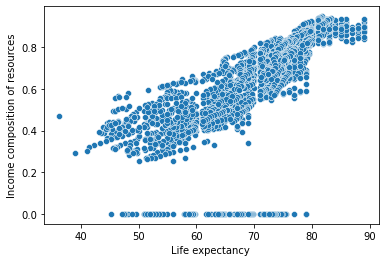

In [31]:
sns.scatterplot(x=dataframe['Life expectancy '],y=dataframe['Income composition of resources']);

In [32]:
def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return dataframe[dataframe['Life expectancy '] <= 40]['Income composition of resources'].mean()
        elif 40<l<=50:
            return dataframe[(40<dataframe['Life expectancy ']) &(dataframe['Life expectancy '] <=50)]['Income composition of resources'].mean()
        elif 50<l<=60:
            return dataframe[(50<dataframe['Life expectancy ']) &(dataframe['Life expectancy '] <=60)]['Income composition of resources'].mean()
        elif 60<l<=70:
            return dataframe[(60<dataframe['Life expectancy ']) &(dataframe['Life expectancy '] <=70)]['Income composition of resources'].mean()
        elif 70<l<=80:
            return dataframe[(70<dataframe['Life expectancy ']) &(dataframe['Life expectancy '] <=80)]['Income composition of resources'].mean()
        elif l>80:
            return dataframe[dataframe['Life expectancy '] > 80]['Income composition of resources'].mean()
    else:
        return i
        
dataframe['Income composition of resources']=dataframe[['Income composition of resources','Life expectancy ']].apply(impute_Income,axis=1)  

<AxesSubplot:xlabel='Life expectancy ', ylabel='Schooling'>

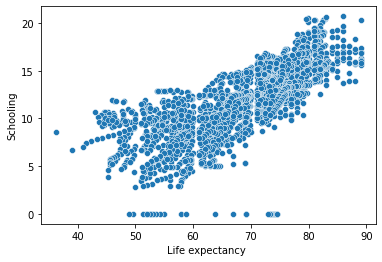

In [33]:
sns.scatterplot(x=dataframe['Life expectancy '],y=dataframe['Schooling'])

In [34]:
def impute_schooling(c):
    s=c[0]
    l=c[1]
    if pd.isnull(s):
        if l<= 40:
            return dataframe[dataframe['Life expectancy '] <= 40]['Schooling'].mean()
        elif 40<l<=44:
            return dataframe[(40<dataframe['Life expectancy ']) &(dataframe['Life expectancy '] <=44)]['Schooling'].mean()
        elif 44<l<50:
            return dataframe[(44<dataframe['Life expectancy ']) &(dataframe['Life expectancy '] <=50)]['Schooling'].mean()
        elif 50<l<=60:
            return dataframe[(50<dataframe['Life expectancy ']) &(dataframe['Life expectancy '] <=60)]['Schooling'].mean()
        elif 60<l<=70:
            return dataframe[(60<dataframe['Life expectancy ']) &(dataframe['Life expectancy '] <=70)]['Schooling'].mean()
        elif 70<l<=80:
            return dataframe[(70<dataframe['Life expectancy ']) &(dataframe['Life expectancy '] <=80)]['Schooling'].mean()
        elif l>80:
            return dataframe[dataframe['Life expectancy '] > 80]['Schooling'].mean()
    else:
        return s
    
dataframe['Schooling']=dataframe[['Schooling','Life expectancy ']].apply(impute_schooling,axis=1)

In [35]:
columns = list(dataframe.columns)
for i in columns:
    print(i, ": ", dataframe[i].isnull().sum())

Country :  0
Year :  0
Status :  0
Life expectancy  :  0
Adult Mortality :  0
infant deaths :  0
Alcohol :  0
percentage expenditure :  0
Hepatitis B :  0
Measles  :  0
 BMI  :  0
under-five deaths  :  0
Polio :  0
Total expenditure :  0
Diphtheria  :  0
 HIV/AIDS :  0
GDP :  0
Population :  0
 thinness  1-19 years :  0
 thinness 5-9 years :  0
Income composition of resources :  0
Schooling :  0


We split the 'Life expectancy' feature from the frame since it's our target

In [36]:
y=dataframe['Life expectancy ']
X=dataframe.drop('Life expectancy ',axis=1)

Now all null values have been filled. Let's turn all categorical features into numerical since our regressing tool can only handle numericals.

In [37]:
Country_dummy=pd.get_dummies(X['Country'])
status_dummy=pd.get_dummies(X['Status'])
X.drop(['Country','Status'],inplace=True,axis=1)
X=pd.concat([X,Country_dummy,status_dummy],axis=1)

Now let's, do build our Ridge regression 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

With Ridge Regress, there are 2 parameters that worth considering, they're 'tol' and 'alphal', let's consider with which value of each will maximize the score of our regression

c:\Users\thaih\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.03153e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\thaih\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.03153e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\thaih\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.03153e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\thaih\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.03153e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\thaih\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: 

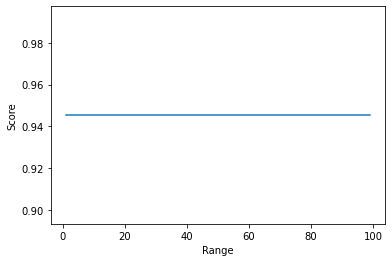

In [40]:
score_array = []
for each in range(1,100):
    ridge_reg = linear_model.Ridge(alpha=1, max_iter=100000, tol=each*0.01)
    ridge_reg.fit(X_train, y_train)
    score_array.append(ridge_reg.score(X_test,y_test))
    
plt.plot(range(1,100),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

c:\Users\thaih\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.61799e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\thaih\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.15952e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\thaih\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.63908e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\thaih\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.00624e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\thaih\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: 

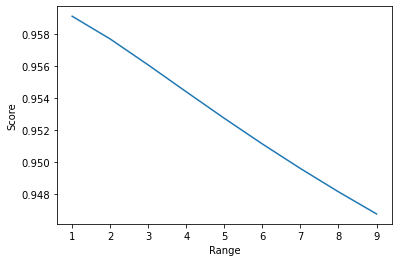

In [41]:
score_array = []
for each in range(1,10):
    ridge_reg = linear_model.Ridge(alpha=each*0.1, max_iter=100000, tol=0.01)
    ridge_reg.fit(X_train, y_train)
    score_array.append(ridge_reg.score(X_test,y_test))
    
plt.plot(range(1,10),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

From two plot above, we can see:
1, As the value of 'tol' changes, our score seems stable, so let's just take tol = 0.1 because it's common
2, As 'alpha' close to 0, our score increases, so let alpha be 0.01 to maximize our score

In [42]:
ridge_reg = linear_model.Ridge(alpha=0.01, max_iter=100000, tol=0.01)
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test,y_test)


c:\Users\thaih\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.65482e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.9599789950603463